# UTagger-python 을 이용한 한국어분석
- 호출
- 파일읽기(UTF-8/CP949 text, JSON)
- 한국어분석 결과 추출(json 양식 처리)

## 1. Hlxcfg.txt 여러 option 설정(분석/출력 조정)
- DOS창에서 UTagger 실행시킨 후[학습사전 load], 다른 DOS창을 띄워 옵션조정 후 테스트


- hadaVerb 0: 서술성명사용언 출력형식(0:어간형[사랑하/VV], 1:어근형[사랑/NNG+하/XSV])
- print_sense_num 1: 의미분별 출력여부(0:출력안함, 1:출력)
- load_uwm 1: 어휘지도(UWordMap) 사용
- tag_poly_uwm 1: 다의어 의미분별(명사, 용언 대상), (load_uwm가 1이어야 함)
- load_multi_lang 1: 대역어 제공 여부
- test_multi_lang 11: 제공대역어(1 영어. 2 일어. 3프랑스(불어) 4스페인 5아랍 6몽골 7베트남 8태국 9인도네시아 10러시아 11중국)
- 그외 복합명사 분해 여부(separate_compound, analyzeMore, analyzeMoreNNG, analyzeMoreMiniFreq, integrate_XPN_XSN)

## 2. UTagger 라이브러리 실행, 명령어

In [1]:
# UTagger가 설치된 fold
UTAGGER_HOME = r'\UTagger_Python_2019_07\bin'

In [2]:
import os

CURRENT_DIR = os.getcwd()     # 추후 분석할 파일이 있는 fold 저장
print(CURRENT_DIR)
os.chdir(UTAGGER_HOME)        # UTagger가 설치된 fold로 이동
print(os.getcwd())

E:\lect_notes\BigData\2020\12주차_한국어분석
E:\UTagger_Python_2019_07\bin


In [3]:
from utagger_use import *    # UTagger-python class 생성 (사전 load)

프로그램 시작
python call utagger function
E:\UTagger_Python_2019_07\Hlxcfg.txt


### 2.1 분석 유형
- 단순 출력: tag_line(s, 3)
- JSON 출력: analyze1(s, 3, 1)
- 의존관계 출력: depen(s)

In [4]:
s = "이런 스케일을 일제는 무지 비능률 따위로 비하 왜곡시켰지요."
#s = "그는 '4대강 사업과 달리, 가덕도 건 김해 건 동남권 신공항 건설이 필요하다는 점에 대한 국민적 합의가 이루어졌다'며 '위치 문제만 논란이 있었을 뿐'이라고 항변했다. "
rt = ut.tag_line(s, 3)  #분석!
print(rt)

이런__01/MMD 스케일__010001/NNG+을/JKO 일제__020000/NNG+는/JX 무지__050001/NNG 비능률/NNG 따위/NNB+로/JKB 비하__020001/NNG 왜곡__010000/NNG+시키/XSV+었/EP+지요/EF+./SF



In [5]:
rt = ut.analyze1(s, 3, 1)  #분석! (영어 대역어)
j = json.loads(rt)
j

[{'ORG': '이런 스케일을 일제는 무지 비능률 따위로 비하 왜곡시켰지요.',
  'RES_MA': '이런__01/MMD 스케일__010001/NNG+을/JKO 일제__020000/NNG+는/JX 무지__050001/NNG 비능률/NNG 따위/NNB+로/JKB 비하__020001/NNG 왜곡__010000/NNG+시키/XSV+었/EP+지요/EF+./SF'},
 {'BSP': ['이런', '01', 'MMD'],
  'CAND': [{'INDEX': 0, 'SCORE': '1.7411', 'TAGGED': '이런__01/MMD'},
   {'INDEX': 1, 'SCORE': '0.0017411', 'TAGGED': '이런__02/IC'},
   {'INDEX': 2, 'SCORE': '0.0017411', 'TAGGED': '이러/VV+ㄴ/ETM'}],
  'CH_BI': 0,
  'HANJA': '',
  'SURF': '이런'},
 {'BSP': ['스케일', '010001', 'NNG'],
  'CAND': [{'INDEX': 0, 'SCORE': '7.2624', 'TAGGED': '스케일__01/NNG+을/JKO'}],
  'CH_BI': 0,
  'HANJA': '',
  'ML': ['scale', 'The scope or range of a task or plan, etc.'],
  'SURF': '스케일을'},
 {'BSP': ['을', '', 'JKO'],
  'CH_BI': 0,
  'HANJA': '',
  'ML': ['eul',
   'A postpositional particle used to indicate the subject that an action has a direct influence on.']},
 {'BSP': ['일제', '020000', 'NNG'],
  'CAND': [{'INDEX': 0, 'SCORE': '7.2624', 'TAGGED': '일제__02/NNG+는/JX'},
   {'INDEX': 1, '

In [7]:
rt = ut.analyze1(s, 3, 11)  #분석! (일본어 대역어)
j = json.loads(rt)
j

[{'ORG': '이런 스케일을 일제는 무지 비능률 따위로 비하 왜곡시켰지요.',
  'RES_MA': '이런__01/MMD 스케일__010001/NNG+을/JKO 일제__020000/NNG+는/JX 무지__050001/NNG 비능률/NNG 따위/NNB+로/JKB 비하__020001/NNG 왜곡__010000/NNG+시키/XSV+었/EP+지요/EF+./SF'},
 {'BSP': ['이런', '01', 'MMD'],
  'CAND': [{'INDEX': 0, 'SCORE': '1.7411', 'TAGGED': '이런__01/MMD'},
   {'INDEX': 1, 'SCORE': '0.0017411', 'TAGGED': '이런__02/IC'},
   {'INDEX': 2, 'SCORE': '0.0017411', 'TAGGED': '이러/VV+ㄴ/ETM'}],
  'CH_BI': 0,
  'HANJA': '',
  'SURF': '이런'},
 {'BSP': ['스케일', '010001', 'NNG'],
  'CAND': [{'INDEX': 0, 'SCORE': '7.2624', 'TAGGED': '스케일__01/NNG+을/JKO'}],
  'CH_BI': 0,
  'HANJA': '',
  'ML': ['规模', ''],
  'SURF': '스케일을'},
 {'BSP': ['을', '', 'JKO'], 'CH_BI': 0, 'HANJA': '', 'ML': ['', '']},
 {'BSP': ['일제', '020000', 'NNG'],
  'CAND': [{'INDEX': 0, 'SCORE': '7.2624', 'TAGGED': '일제__02/NNG+는/JX'},
   {'INDEX': 1, 'SCORE': '1.7411e-05', 'TAGGED': '일제__03/NNG+는/JX'}],
  'CH_BI': 0,
  'HANJA': '日帝',
  'SURF': '일제는'},
 {'BSP': ['는', '', 'JX'], 'CH_BI': 0, 'HANJA': '', 

In [8]:
s = "이런 스케일을 일제는 무지 비능률 따위로 비하 왜곡시켰지요."
rt = ut.depen(s)  #분석!
print(rt)
j = json.loads(rt)
j

[{"BSP":["이런","01","MMD"],"GOV":1,"ID":0,"SURF":"이런"},{"BSP":["스케일","010001","NNG"],"GOV":7,"ID":1,"SURF":"스케일을"},{"BSP":["을","","JKO"]},{"BSP":["일제","020000","NNG"],"GOV":7,"ID":2,"SURF":"일제는"},{"BSP":["는","","JX"]},{"BSP":["무지","050001","NNG"],"GOV":4,"ID":3,"SURF":"무지"},{"BSP":["비능률","","NNG"],"GOV":5,"ID":4,"SURF":"비능률"},{"BSP":["따위","","NNB"],"GOV":7,"ID":5,"SURF":"따위로"},{"BSP":["로","","JKB"]},{"BSP":["비하","020001","NNG"],"GOV":7,"ID":6,"SURF":"비하"},{"BSP":["왜곡","010000","NNG"],"GOV":7,"ID":7,"SURF":"왜곡시켰지요."},{"BSP":["시키","","XSV"]},{"BSP":["었","","EP"]},{"BSP":["지요","","EF"]},{"BSP":[".","","SF"]}]


[{'BSP': ['이런', '01', 'MMD'], 'GOV': 1, 'ID': 0, 'SURF': '이런'},
 {'BSP': ['스케일', '010001', 'NNG'], 'GOV': 7, 'ID': 1, 'SURF': '스케일을'},
 {'BSP': ['을', '', 'JKO']},
 {'BSP': ['일제', '020000', 'NNG'], 'GOV': 7, 'ID': 2, 'SURF': '일제는'},
 {'BSP': ['는', '', 'JX']},
 {'BSP': ['무지', '050001', 'NNG'], 'GOV': 4, 'ID': 3, 'SURF': '무지'},
 {'BSP': ['비능률', '', 'NNG'], 'GOV': 5, 'ID': 4, 'SURF': '비능률'},
 {'BSP': ['따위', '', 'NNB'], 'GOV': 7, 'ID': 5, 'SURF': '따위로'},
 {'BSP': ['로', '', 'JKB']},
 {'BSP': ['비하', '020001', 'NNG'], 'GOV': 7, 'ID': 6, 'SURF': '비하'},
 {'BSP': ['왜곡', '010000', 'NNG'], 'GOV': 7, 'ID': 7, 'SURF': '왜곡시켰지요.'},
 {'BSP': ['시키', '', 'XSV']},
 {'BSP': ['었', '', 'EP']},
 {'BSP': ['지요', '', 'EF']},
 {'BSP': ['.', '', 'SF']}]

### 2.2 어휘지도(UWordMap) API
- UWM1설명 git.txt 참조

#### UWordMap Browser 
- http://klplab/ulsan.ac.kr
- http://203.250.77.242:7070/


- 상위어 검색: hyper 사과__050000/NNG
- 상위어 tree 검색: hypers 사과__050000/NNG
- 하위어 검색: hypo 사과__050000/NNG
- 유의어 검색: syn 사과__050000/NNG
- 반의어 검색: anti 남자__020001/NNG (현재 API 제공하지 않음)


- 하위범주화(의미제약) 정보 (NAV)
    - 명사와 동사 연관 논항 검색: NAV 열매__010001/NNG 먹__020101/VV => eul (목적격)
    - 명사와 논항을 의미제약으로 가지는 용언검색: NAV 사과__050000/NNG eul
    - 용언의 논항의 의미제약으로 연결된 명사 검색: NAV eul 먹__020101/VV
- 입력된 명사와 용언에 대해 직접 연결된 논항이 없을 경우 (NV2A)
    - NV2A 사고__120001/NNG 놀라__000003/VV => '사고'의 사위어 중 '놀라다'와 연결된 논항
    - NV2A 사과__050000/NNG 먹__020101/VV  => '사과'의 상위 노드 중 '먹다'와 연결된 명사 및 논항 추출
    

- 논항 코드표
    - eul	을 를
    - e	에
    - ege	에게
    - e_ege	에 에게(이 항목 재확인 필요)
    - eseo	에서
    - eseo_egeseo	에서, 에게서
    - i_ga	이 가
    - i	이 
    - ro	로
    - wa	와
    - rago	라고
    - robuteo	로부터
    - boda	보다
    - cheoreom	처럼

In [9]:
s = "hyper 사과__050000/NNG"
rt = ut.uwm1(s)
rt

'과일__010000/NNG'

In [10]:
s = "hypers 사과__050000/NNG"
rt = ut.uwm1(s)
rt

'과일__010000/NNG 열매__010001/NNG 물질__020001/NNG 물체__000001/NNG 물건__000001/NNG'

In [11]:
s = "hypo 사과__050000/NNG"
rt = ut.uwm1(s)
rt

'구월__010000/NNG 단풍__020000/NNG 돌사과/NNG 딜리셔스/NNG 룡전/NNG 막사과__010000/NNG 북청__010000/NNG 아침노을__020000/NNG 올사과/NNG 왜금__010000/NNG 욱__040000/NNG 인도__070000/NNG 쭈그렁사과__000001/NNG 쭈그렁사과__000002/NNG 청사과__000002/NNG 큰금강/NNG 풋사과/NNG 햇사과/NNG 허천/NNG 홍옥__010001/NNG'

In [12]:
s = "syn 사과__050000/NNG"
rt = ut.uwm1(s)
rt

'빈파/NNG 평과/NNG'

In [13]:
s = "anti 남자__020001/NNG"
rt = ut.uwm1(s)
rt

''

In [14]:
s = "NAV 열매__010001/NNG 먹__020101/VV"
rt = ut.uwm1(s)
rt

'eul'

In [15]:
s = "NAV 사과__050000/NNG eul"
rt = ut.uwm1(s)
rt

'가르치__020000/VV 가르키__000002/VV 가리치__000002/VV 가리키__010001/VV 갉__020000/VV 까먹__000001/VV 까무/VV 까크/VV 깡크/VV 너을/VV 네끼/VV 노나/VV 노누/VV 녾/VV 농구/VV 더디__020001/VV 더지/VV 던디/VV 데끼/VV 데디__000001/VV 데미__020000/VV 데지__000001/VV 덴지/VV 돈사/VV 딜__010000/VV 또개/VV 띵기__000001/VV 막__020000/VV 망글/VV 맹글/VV 맹길/VV 묵__030000/VV 배내/VV 벌르/VV 보내__000101/VV 쌍글/VV 아르키__000002/VV 아삭거리__000001/VV 아작하/VV 아지/VV 어불/VV 와삭거리__000002/VV 우렴하__000001/VV 자리__030000/VV 잙/VV 졸구/VV 짜르__010001/VV 짥/VV 짱글/VV 쬐기/VV 타__100000/VV 타__110000/VV 폴/VV'

In [16]:
s = "NAV eul 먹__020101/VV"
rt = ut.uwm1(s)
rt

'각질용해제/NNG 감자__010002/NNG 갑각류/NNG 고도리__040001/NNG 관상어/NNG 근이완제/NNG 금약__020000/NNG 금창산__020000/NNG 꿀/NNG 날것__010000/NNG 농작물/NNG 먹이/NNG 먹임약/NNG 물__010001/NNG 물고기/NNG 물자체/NNG 미장__020000/NNG 반찬/NNG 버섯__020000/NNG 붕대액/NNG 비누약/NNG 비듬약/NNG 뿌리__000001/NNG 뿔질용해약/NNG 세제__040002/NNG 세척제/NNG 씨__010001/NNG 안약/NNG 알__010101/NNG 약__070001/NNG 연마제/NNG 연체동물/NNG 열매__010001/NNG 오일페니실린/NNG 외과약/NNG 외약__020000/NNG 외용약/NNG 우림보조약/NNG 유충제/NNG 음료/NNG 음식__000001/NNG 음식물__020000/NNG 의약물/NNG 의약품/NNG 이담제/NNG 이붕고/NNG 이슬__000003/NNG 이약__020000/NNG 자극제__000003/NNG 저피고/NNG 전약__030002/NNG 전제__150000/NNG 점비제/NNG 점활제/NNG 접촉성벌레약/NNG 정충약/NNG 젖__000001/NNG 제해제__000001/NNG 좌약__010000/NNG 좌약__020000/NNG 주입제/NNG 주제__030000/NNG 즙__000001/NNG 증산제/NNG 진흙고/NNG 창약/NNG 첨초/NNG 청안수/NNG 촉살띠/NNG 취약__010001/NNG 치료제__020000/NNG 치험약/NNG 침제__020001/NNG 침제__020002/NNG 탈모제/NNG 판토찌드/NNG 팽윤제/NNG 페니실아민/NNG 풍약__020000/NNG 피부약/NNG 피임약/NNG 함수제/NNG 항콕시디움첨가제/NNG 해독제/NNG 헥실레조르시놀/NNG 화농제/NNG 화상유/NNG 환__040001/NNG 훈약/NNG 훈연제/NNG 훈제__020000/NNG 흡인제/NNG 흡입

In [17]:
s = "NV2A 사고__120001/NNG 놀라__000003/VV"
rt = ut.uwm1(s)
rt

'모양__020001/NNG e'

In [18]:
s = "NV2A 사과__050000/NNG 먹__020101/VV"
rt = ut.uwm1(s)
rt

'열매__010001/NNG eul'

### 2.3 어휘지도상 어휘정보 추출
- 다의어 어휘의 어휘 정보: word_info('일__070000/NNG', 1)
- (어휘, 품사)에서 모든 (어휘, 품사)의 정보: polysemy('사과','NNG')

In [20]:
s = "일__070000/NNG"
rt = ut.word_info(s, 2)
j = json.loads(rt)
j

{'INFO': {'BSP': ['일', '070000', 'NNG'],
  'HANJA': '日',
  'MEAN': '하루 동안.',
  'ML': ['いちにち【一日】', '1日の間。'],
  'PARENT': '동안__010001/NNG',
  'SIM': [],
  'SPE': '',
  'SYN': [],
  'USAGE': '일 3회 복용.'}}

In [23]:
s = "먹"
p = "NNG"
rt = ut.polysemy(s, p)
j = json.loads(rt)
j

{'POLYSEMY': {'POLY_ARRAY': [{'BSP': ['먹', '010001', 'NNG'],
    'HANJA': '',
    'MEAN': '벼루에 물을 붓고 갈아서 글씨를 쓰거나 그림을 그릴 때 사용하는 검은 물감. 아교를 녹인 물에 그을음을 반죽하여 굳혀서 만든다.'},
   {'BSP': ['먹', '010002', 'NNG'],
    'HANJA': '',
    'MEAN': '먹물⑴. >>벼루에 먹을 갈아 만든 검은 물.'},
   {'BSP': ['먹', '010003', 'NNG'], 'HANJA': '', 'MEAN': '검은 빛깔의 뜻을 나타내는 말.'},
   {'BSP': ['먹', '020000', 'NNG'], 'HANJA': '', 'MEAN': "'똥'을 달리 이르는 말."}],
  'WORD': '먹/NNG'}}

## 3. 문장 한국어분석1
- corpus 폴더 하의 모든 text 파일을 한국어 형태소분석
- UTagger 간단 분석 결과
- 명사/대명사의 출현빈도 count

In [24]:
os.chdir(CURRENT_DIR)      # 분석할 파일이 있는 fold로 작업 폴더를 바꿈
print(os.getcwd())

E:\lect_notes\BigData\2020\12주차_한국어분석


In [26]:
import os
import pdb
import re

# 다의번호 제거용 정규식 (Hlxcfg에서 print_sense_num, tag_poly_uwm 설정확인)
sense = re.compile('__\d{2, 6}')

dir_path = r"corpus"    # 태깅할 파일을 포함하는 폴더 이름

file_list = os.listdir(dir_path)   # 폴더 하위의 file 
print(file_list)
print(len(file_list))   # corpus 폴더 내의 파일 갯수

for in_file in file_list:
    if ( '_tag' in in_file ): continue     # 이미 tag은 태깅 대상 아님
    print(in_file)
    file_path = os.path.join(dir_path, in_file)
    in_handle = open(file_path, "r", encoding='cp949')   # cp949 파일 encoding
    names = in_file.split('.')
    out_file_name = names[0] + '_tag.txt'
    file_path = os.path.join(dir_path, out_file_name)
    out_handle = open(file_path, "w", encoding='cp949')
    #outfile2 = open(file_path2, "w", encoding='cp949')
    
    char_num = word_num = line_num = 0
    word_list = []
    sents = in_handle.readlines()
    for line in sents:
        s = line.strip()   # line 끝 줄바꿈 없앰
        rt = ut.tag_line(s, 3)  #분석!
        out_handle.write("%s\n%s\n" %(s, rt))
        #rt_regex = sense.sub('', rt)     # 동형이의어/다의어번호 제거
        #outfile2.write("%s\n%s\n" %(line, rt_regex))
        #pdb.set_trace()

    in_handle.close()
    out_handle.close()

['corpus1.txt', 'corpus1_tag.txt', 'corpus2.txt', 'corpus2_tag.txt', 'corpus3.txt', 'corpus3_tag.txt', 'corpus4.txt', 'corpus4_tag.txt', 'corpus5.txt', 'corpus5_tag.txt', 'corpus6.txt', 'corpus6_tag.txt', 'corpus7.txt', 'corpus7_tag.txt', 'corpus8.txt', 'corpus8_tag.txt']
16
corpus1.txt
corpus2.txt
corpus3.txt
corpus4.txt
corpus5.txt
corpus6.txt
corpus7.txt
corpus8.txt


## 4. 문장 한국어분석2
- 신문기사(JSON 파일)의 title 한국어 형태소분석
- UTagger 의존관계분석 결과
- 명사/대명사의 출현빈도 count
- http://excelsior-cjh.tistory.com/94 참조

In [27]:
from os.path import isfile, join
import re		# regular expression
import json
from collections import Counter, defaultdict

In [28]:
def extract_pos_depen(result_utagger, type=0):
    """ sentence에서 명사(NNG)만 추출 """ 
    """ 입력문: "이런 스케일을 일제는 무지 비능률 따위로 비하 왜곡시켰지요" """
    """ 출력: [{'BSP': ['이런', '', 'MMD'], 'GOV': 7, 'ID': 0, 'SURF': '이런'},
         {'BSP': ['스케일', '', 'NNG'], 'GOV': 7, 'ID': 1, 'SURF': '스케일을'},
         {'BSP': ['을', '', 'JKO']},
         {'BSP': ['일제', '', 'NNG'], 'GOV': 7, 'ID': 2, 'SURF': '일제는'},
         {'BSP': ['는', '', 'JX']},
         {'BSP': ['무지', '', 'NNG'], 'GOV': 4, 'ID': 3, 'SURF': '무지'},
         {'BSP': ['비능률', '', 'NNG'], 'GOV': 5, 'ID': 4, 'SURF': '비능률'},
         {'BSP': ['따위', '', 'NNB'], 'GOV': 7, 'ID': 5, 'SURF': '따위로'},
         {'BSP': ['로', '', 'JKB']},
         {'BSP': ['비하', '', 'NNG'], 'GOV': 7, 'ID': 6, 'SURF': '비하'},
         {'BSP': ['왜곡', '', 'NNG'], 'GOV': 7, 'ID': 7, 'SURF': '왜곡시켰지요.'},
         {'BSP': ['시키', '', 'XSV']},
         {'BSP': ['었', '', 'EP']},
         {'BSP': ['지요', '', 'EF']},
         {'BSP': ['.', '', 'SF']}] """
    if (type == 0):
        POS_TAG = {'NNG', 'NNP'}     # 형태소분석 후 추출할 TAG SET
    elif (type == 1):
        POS_TAG = {'VA', 'VV', 'VCN'}
    else:            # 다른 품사(MAG, MAJ, MM 등)
        POS_TAG = {'MAG', 'MAJ', 'MMD', 'MMA', 'MMN', 'XPN', 'XSN'}
    
    words_list = []
    
    for one_morph in result_utagger:	# 하나의 어절에 대한 분석 결과
        bsp = one_morph["BSP"]
        if (bsp[2] in POS_TAG):
            if (type == 1):
                words_list.append(bsp[0]+'다')
            else:
                words_list.append(bsp[0])
                
    return( words_list )

In [29]:
sense_tag  = re.compile(r'__\d{2,6}')

def extract_pos_tag_line(result, type=0):
    """ sentence에서 명사(NNG)만 추출 """ 
    """ 입력문: "이런 스케일을 일제는 무지 비능률 따위로 비하 왜곡시켰지요" """
    """ 출력: 이런__01/MMD 스케일__010001/NNG+을/JKO 일제__020000/NNG+는/JX 무지__050001/NNG 비능률/NNG 따위/NNB+로/JKB 
        비하__020001/NNG 왜곡__010000/NNG+시키/XSV+었/EP+지요/EF+./SF"""
    if (type == 0):
        POS_TAG = {'NNG', 'NNP'}     # 형태소분석 후 추출할 TAG SET
    elif (type == 1):
        POS_TAG = {'VA', 'VV', 'VCN'}
    else:            # 다른 품사(MAG, MAJ, MM 등)
        POS_TAG = {'MAG', 'MAJ', 'MM', 'XPN', 'XSN'}

    words_list = []
    
    result = sense_tag.sub('', result)         # 동형이의어 번호 제거
    tagged_ej = result.split()   # 이런__01/MM 스케일__01/NNG+을/JKO 일제__02/NNG+는/JX ...

    for eojel in tagged_ej:
        morphs = eojel.split('+')    # 형태소 단위로 분리
        for morph in morphs:
            root_tag = morph.split('/')    # 어근 TAG 분리
            if (root_tag[1] in POS_TAG):
                if (type == 1):
                    words_list.append(root_tag[0]+'다')
                else:
                    words_list.append(root_tag[0])
                
    return( words_list )

In [30]:
# json 파일
openFileName = 'chosun_facebook_2016-10-01_2017-03-12.json'

In [31]:
# Word Cloud 결과 저장 파일
cloudImagePath = 'chosun_facebook_wordcloud.jpg'
#cloudImagePath = 'jtbcnews_facebook_wordcloud.jpg'

In [32]:
rfile = open(openFileName, 'r', encoding='utf-8').read()

In [33]:
jsonData = json.loads(rfile)
message = ''
jsonData[0]

{'created_time': '2017-03-11 22:54:31',
 'link': 'http://news.chosun.com/site/data/html_dir/2017/03/11/2017031101129.html?Dep0=facebook&topics',
 'message': '',
 'name': 'THAAD(사드)를 읽는 법에 대한 고찰',
 'num_angrys': 0,
 'num_comments': 11,
 'num_hahas': 4,
 'num_likes': 49,
 'num_loves': 0,
 'num_reactions': 0,
 'num_sads': 0,
 'num_shares': 4,
 'num_wows': 0,
 'post_id': '376570488117_10155141348063118'}

In [34]:
# 하나의 문장을 의존관계분석(depen) 결과를 활용하여 명사 추출
import pdb
wordInfo = defaultdict(int)
for item in jsonData:
    if 'message' in item.keys():
        if item['message'] == '':
            continue
        message = re.sub(r'(\n|\[.*\]|조선일보)', ' ', item['message'])    # \n, [***] 는 ' '
        message = message.strip()
        result_utagger = json.loads(ut.depen(message))
        words = extract_pos_depen(result_utagger, 0)    # 의존관계분석 결과에서 명사만 추출하는 함수
        #words = extract_pos_depen(result_utagger, 1)    # 의존관계분석 결과에서 용언만 추출하는 함수

        count = Counter(words)
        #print( count )
        
        # most_common은 입력된 값의 요소들 중 빈도수(frequency)가 높은 순으로 상위 n개를 리스트 안의 tuple 형태로 반환한다.
        # n을 입력하지 않은 경우, 요소 전체를 [('값', 개수)]의 형태로 반환
        for tags, counts in count.most_common():
            if (len(str(tags)) > 1):
                wordInfo[tags] += counts
                
print(wordInfo['최순실'], len(wordInfo))
#print(wordInfo['타다'], len(wordInfo))

38 669


In [35]:
wordInfo

defaultdict(int,
            {'인디': 3,
             '밴드': 3,
             '치즈': 4,
             '꽃길': 1,
             '헌재': 6,
             '대통령': 19,
             '박근혜': 10,
             '주문': 1,
             '청구인': 1,
             '탄핵': 6,
             '클립': 2,
             '장난질': 1,
             '쉐어': 8,
             '하우스': 8,
             '헌정사': 1,
             '최초': 1,
             '파면': 2,
             '재판관': 2,
             '전원': 2,
             '일치': 2,
             '대선': 1,
             '실시': 1,
             '유력': 1,
             '인용': 1,
             '그림': 3,
             '심판': 1,
             '선고': 1,
             '촛불': 7,
             '태극기': 1,
             '진영': 1,
             '부근': 1,
             '대규모': 1,
             '찬반': 1,
             '집회': 9,
             '김정남': 3,
             '김한솔': 3,
             '아들': 2,
             '아버지': 2,
             '김정은': 2,
             '북한': 2,
             '등장': 1,
             '뒷담화': 1,
             '후배': 1,
             '여학생': 1

In [40]:
# 하나의 문장을 간단분석 결과를 활용하여 명사 추출
import pdb
wordInfo = defaultdict(int)
for item in jsonData:
    if 'message' in item.keys():
        if item['message'] == '':
            continue
        message = re.sub(r'(\n|\[.*\]|조선일보)', ' ', item['message'])    # \n, [***] 는 ' '
        message = message.strip()
        
        result_utagger = ut.tag_line(message, 3)           # 간단분석

        words = extract_pos_tag_line(result_utagger, 0)    # 간단분석 결과에서 명사만 추출하는 함수
        #words = extract_pos_tag_line(result_utagger, 1)    # 간단분석 결과에서 용언만 추출하는 함수
        count = Counter(words)
        #print( count )
        
        # most_common은 입력된 값의 요소들 중 빈도수(frequency)가 높은 순으로 상위 n개를 리스트 안의 tuple 형태로 반환한다.
        # n을 입력하지 않은 경우, 요소 전체를 [('값', 개수)]의 형태로 반환
        for tags, counts in count.most_common():
            if (len(str(tags)) > 1):
                wordInfo[tags] += counts
                
print(wordInfo['최순실'], len(wordInfo))
#print(wordInfo['타다'], len(wordInfo))

38 669


In [37]:
wordInfo

defaultdict(int,
            {'소개하다': 2,
             '하다': 16,
             '걷다': 2,
             '파면하다': 1,
             '처보다': 1,
             '그리다': 2,
             '알려지다': 2,
             '갖다': 1,
             '살해되다': 1,
             '차다': 1,
             '폭행하다': 1,
             '만들다': 6,
             '들리다': 1,
             '쓰다': 3,
             '되다': 7,
             '선택하다': 1,
             '있다': 6,
             '바라보다': 2,
             '어떻다': 4,
             '생각하다': 5,
             '좋다': 1,
             '나가다': 1,
             '맞다': 3,
             '멋지다': 1,
             '잠재우다': 1,
             '모르다': 5,
             '의도하다': 1,
             '지나가다': 1,
             '받다': 3,
             '가다': 6,
             '괜찮다': 2,
             '바르다': 1,
             '죽다': 2,
             '등장하다': 1,
             '같다': 2,
             '추락하다': 2,
             '타다': 4,
             '크다': 4,
             '다치다': 1,
             '입다': 1,
             '잘하다': 1,
             '링크되다': 1,
             '남기다'

## 5. 상위 top_n 단어의 빈도 막대그래프
- 그래프에서 한글 label 출력
- 한글폰트 파일

In [41]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [42]:
top_n=30
Sorted_Dict_Values = sorted(wordInfo.values(), reverse=True)
print(Sorted_Dict_Values[:top_n])
Sorted_Dict_Keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
print(Sorted_Dict_Keys[:top_n])

[38, 19, 17, 16, 16, 14, 10, 9, 9, 9, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5]
['최순실', '대통령', '청문회', '국정', '조사', '사진', '박근혜', '집회', '기자', '국회', '쉐어', '하우스', '서울', '우병우', '출석', '촛불', '민정', '수석', '김기춘', '광화문', '광장', '헌재', '탄핵', '뉴스', '자전거', '트럼프', '협정', '수능', '박영선', '청와대']


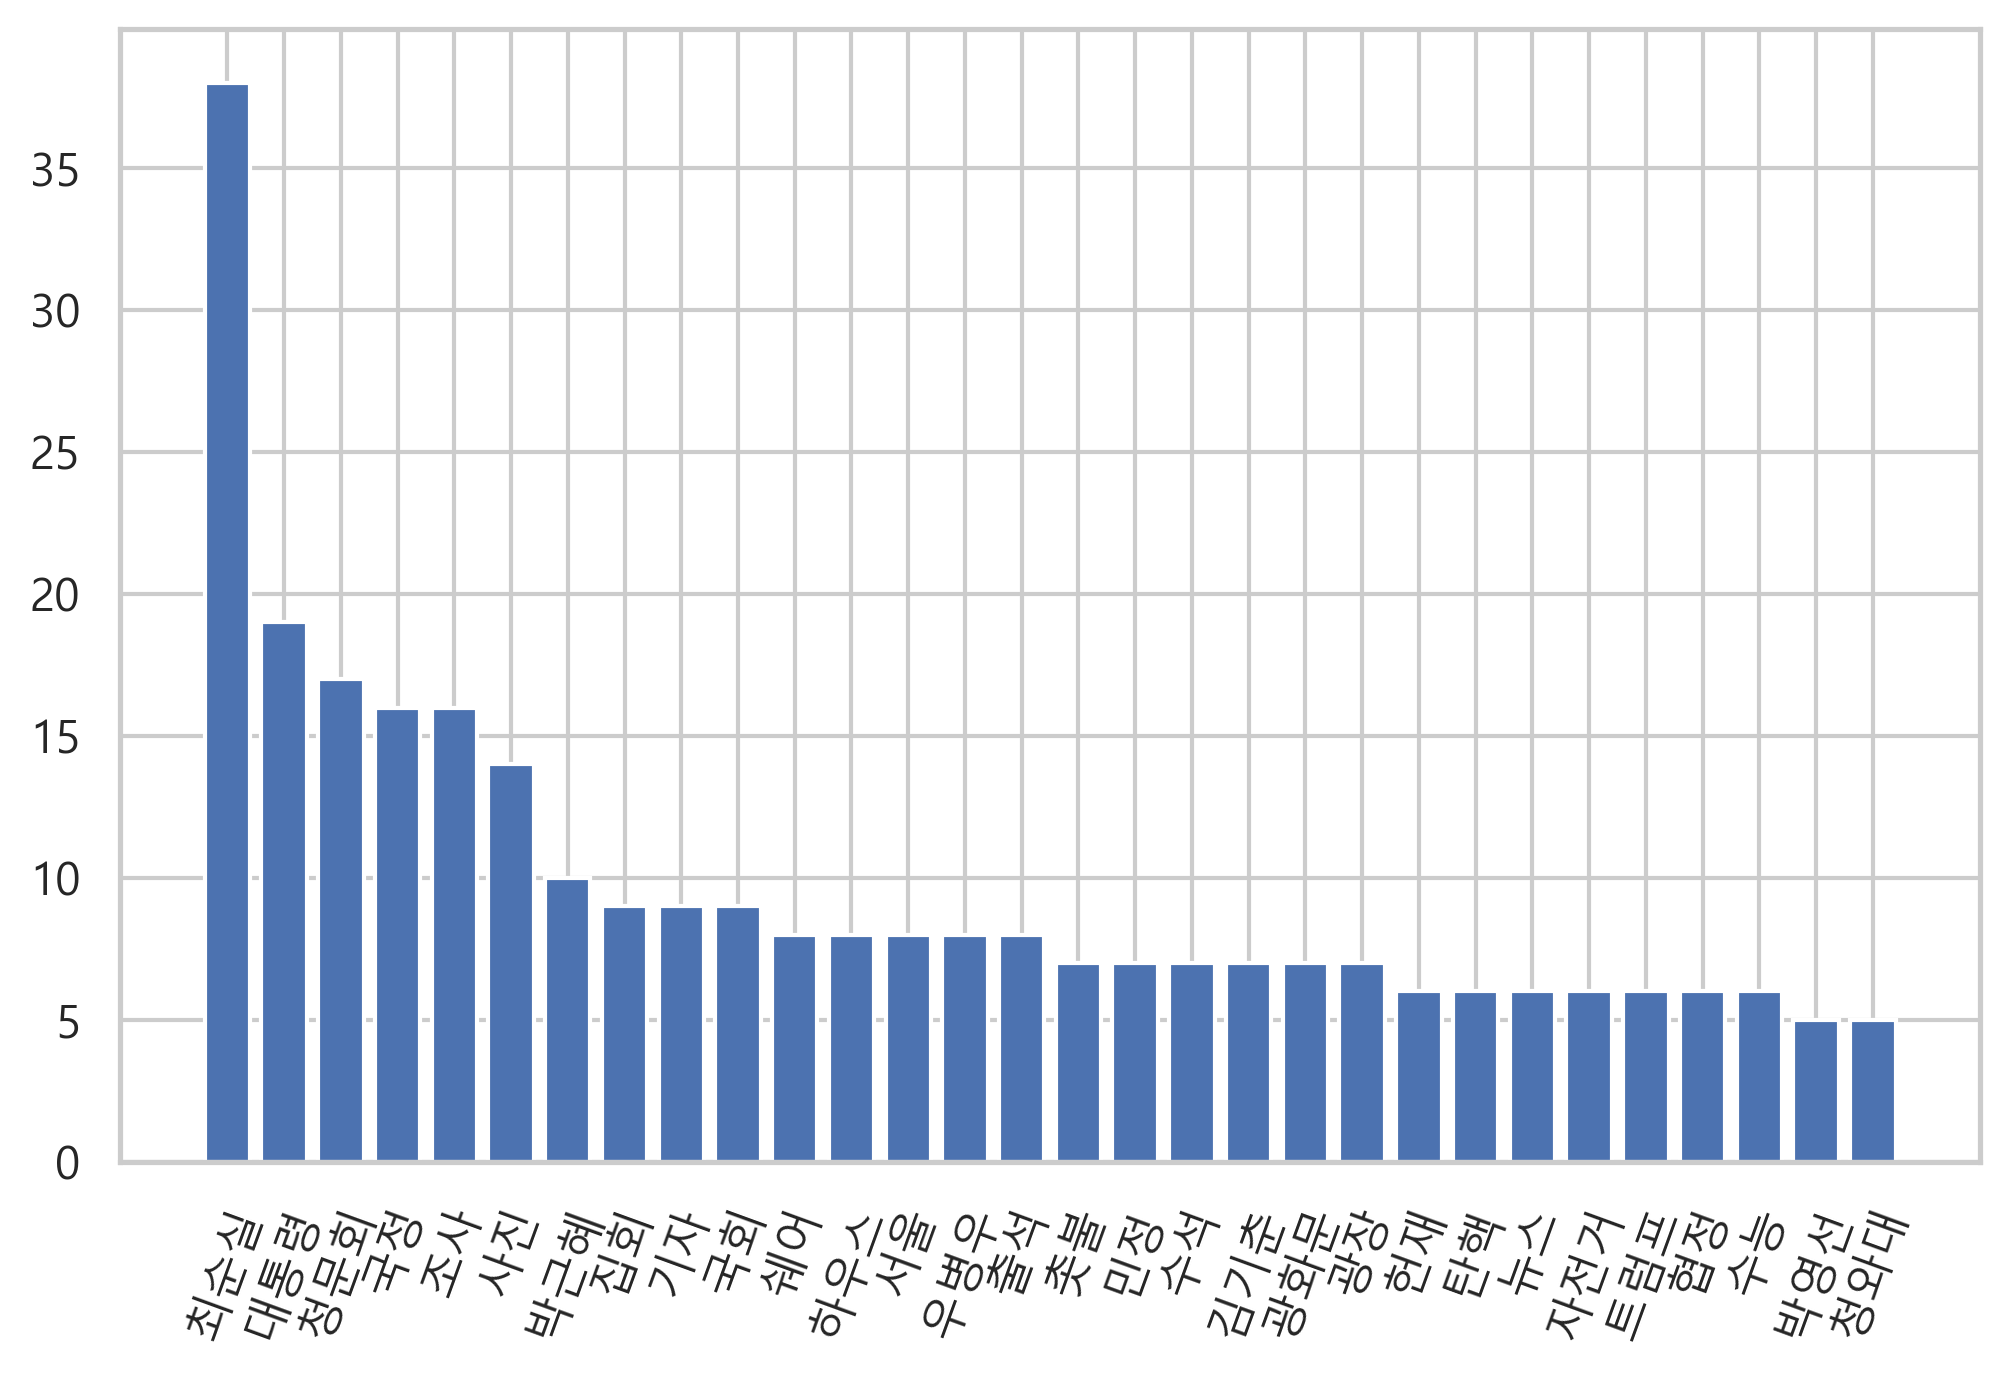

In [43]:
plt.bar(range(top_n), Sorted_Dict_Values[:top_n], align='center')
plt.xticks(range(top_n), list(Sorted_Dict_Keys[:top_n]), rotation='70')

plt.show()

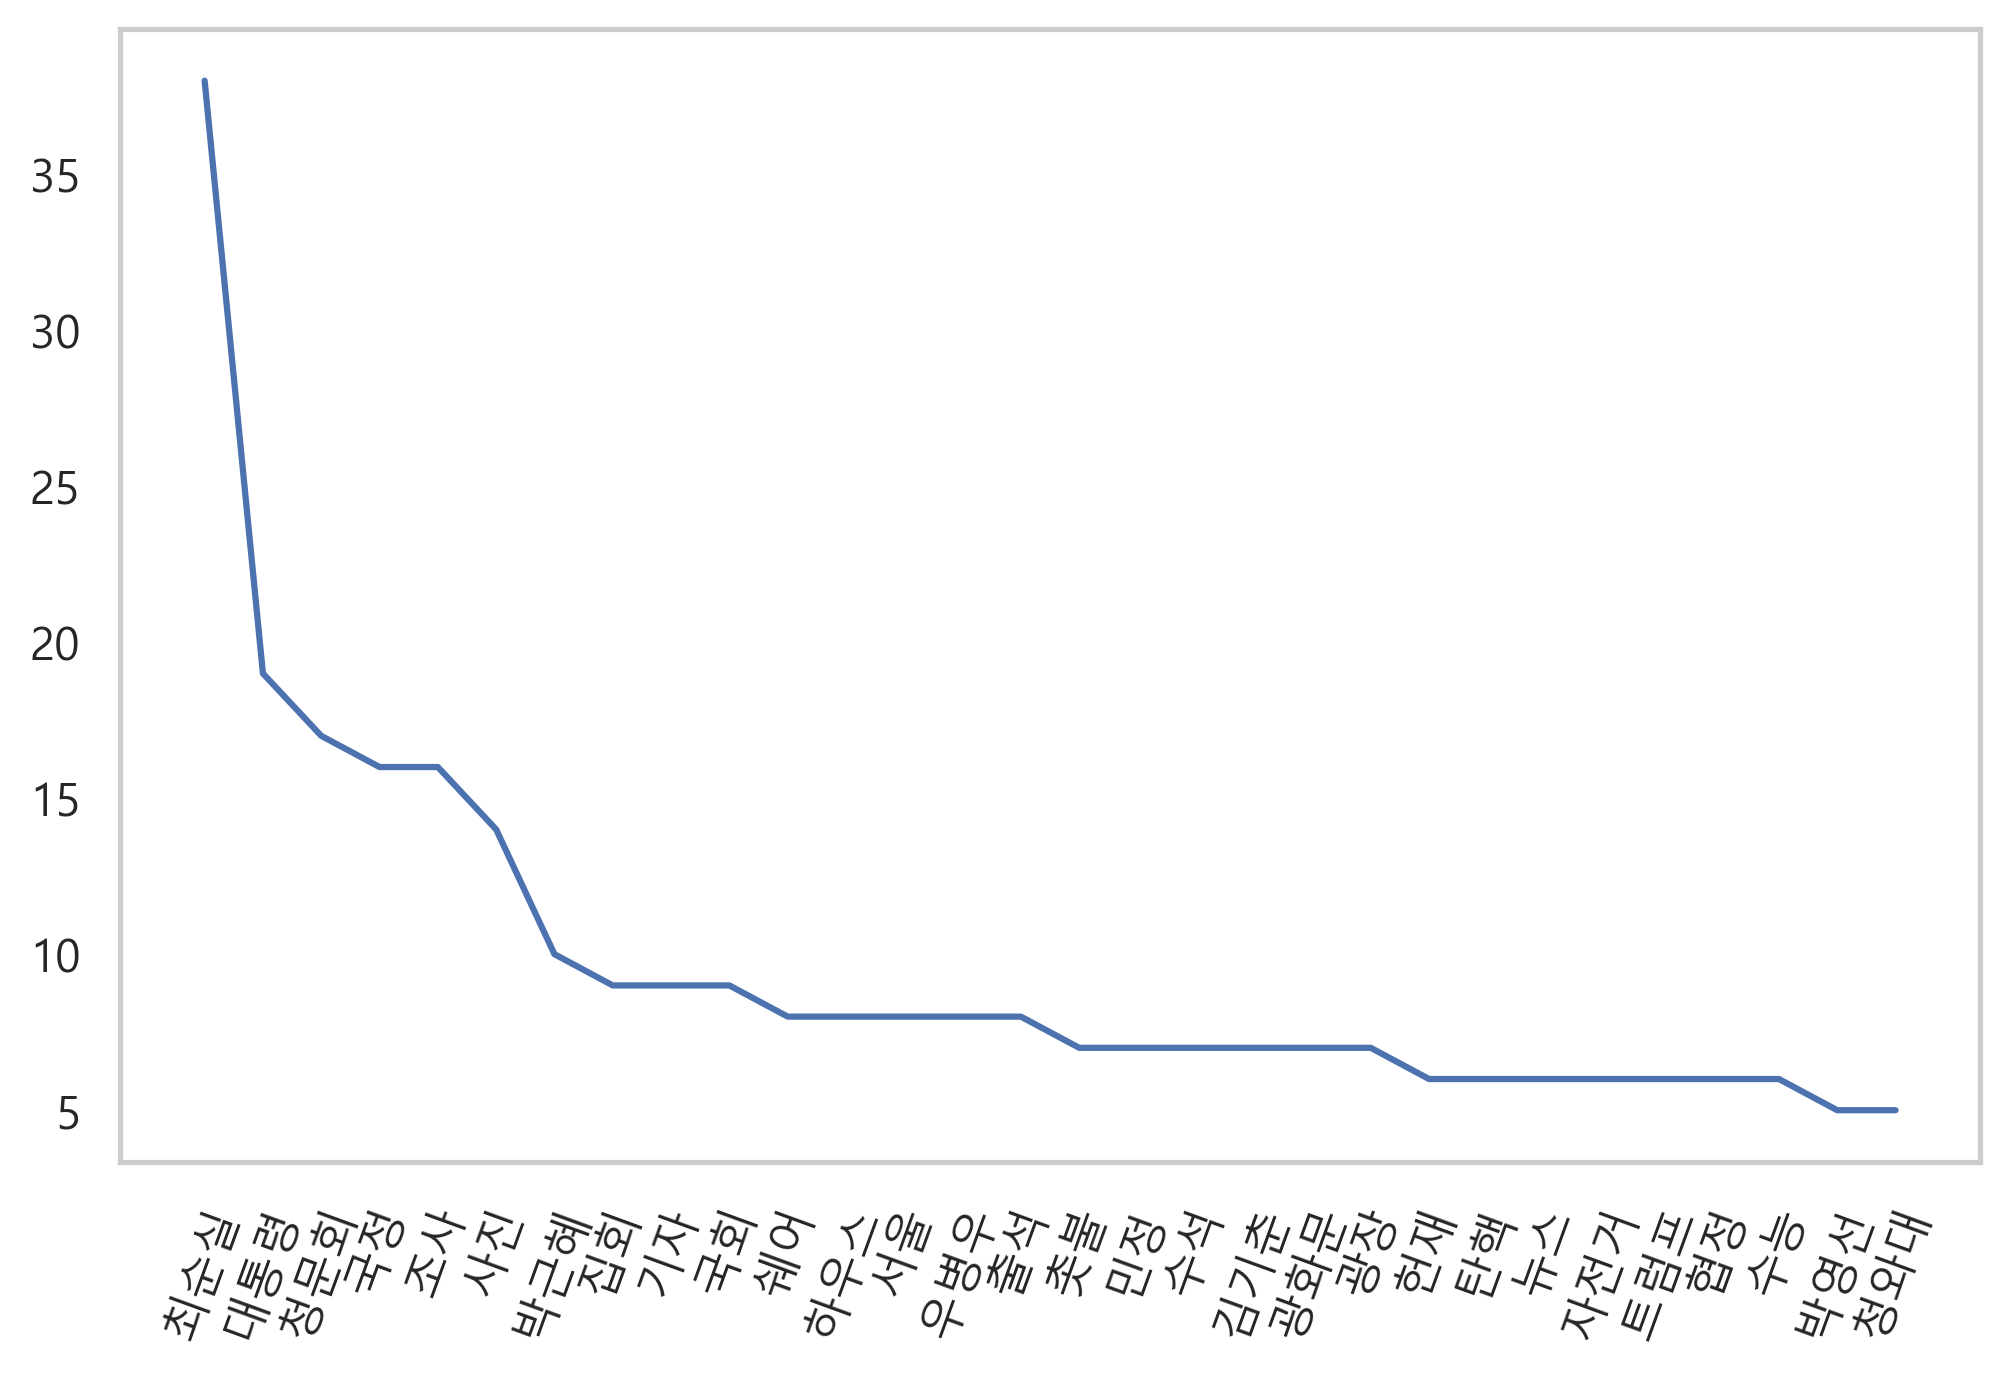

In [44]:
plt.plot(range(top_n), Sorted_Dict_Values[:top_n])
plt.grid()
plt.xticks(range(top_n), list(Sorted_Dict_Keys[:top_n]), rotation='70')
plt.show()

## 6. Word Cloud
- http://wordcloud.kr/
- https://www.wordclouds.com/
- https://www.jasondavies.com/wordcloud/ 
- https://amueller.github.io/word_cloud/index.html
- pytagcloud 라이브러리
- word cloud에 출력할 단어(top_n 의 3배)


- wordcloud 라이브러리
- 간단예제: https://lovit.github.io/nlp/2018/04/17/word_cloud/


- imshow(): https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/interpolation_methods.html

In [45]:
# word cloud에 나타날 단어 수 : top_n*3
top_n_wordInfo = dict()
for i in range(top_n*3):
    top_n_wordInfo[Sorted_Dict_Keys[i]] = Sorted_Dict_Values[i]

top_n_wordInfo.items()

dict_items([('최순실', 38), ('대통령', 19), ('청문회', 17), ('국정', 16), ('조사', 16), ('사진', 14), ('박근혜', 10), ('집회', 9), ('기자', 9), ('국회', 9), ('쉐어', 8), ('하우스', 8), ('서울', 8), ('우병우', 8), ('출석', 8), ('촛불', 7), ('민정', 7), ('수석', 7), ('김기춘', 7), ('광화문', 7), ('광장', 7), ('헌재', 6), ('탄핵', 6), ('뉴스', 6), ('자전거', 6), ('트럼프', 6), ('협정', 6), ('수능', 6), ('박영선', 5), ('청와대', 5), ('국방부', 5), ('페북', 5), ('라이브', 5), ('치즈', 4), ('세상', 4), ('버스', 4), ('페이스북', 4), ('엄마', 4), ('녹취', 4), ('보호', 4), ('갑옷', 4), ('공개', 4), ('담화', 4), ('취재', 4), ('인디', 3), ('밴드', 3), ('그림', 3), ('김정남', 3), ('김한솔', 3), ('발표', 3), ('문제', 3), ('이름', 3), ('제공', 3), ('콘텐츠', 3), ('방법', 3), ('관련', 3), ('사설', 3), ('오늘', 3), ('고영태', 3), ('강아지', 3), ('영상', 3), ('촬영', 3), ('주차', 3), ('기업', 3), ('총수', 3), ('증언', 3), ('스트레칭', 3), ('의혹', 3), ('국민', 3), ('거부', 3), ('한일', 3), ('정보', 3), ('현장', 3), ('클립', 2), ('파면', 2), ('재판관', 2), ('전원', 2), ('일치', 2), ('아들', 2), ('아버지', 2), ('김정은', 2), ('북한', 2), ('간식', 2), ('대학', 2), ('특검', 2), ('시장', 2), ('문재인', 2

### 6.2 pytagcloud 라이브러리 이용

In [46]:
import pytagcloud
import webbrowser

pygame 2.0.0 (SDL 2.0.12, python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [47]:
# maxsize : word cloud에서 최대 글자크기
taglist = pytagcloud.make_tags(top_n_wordInfo.items(), maxsize=80)
taglist

[{'color': (110, 15, 18), 'size': 83, 'tag': '최순실'},
 {'color': (128, 201, 192), 'size': 49, 'tag': '대통령'},
 {'color': (192, 43, 169), 'size': 45, 'tag': '청문회'},
 {'color': (87, 114, 82), 'size': 43, 'tag': '국정'},
 {'color': (123, 86, 193), 'size': 43, 'tag': '조사'},
 {'color': (82, 136, 175), 'size': 39, 'tag': '사진'},
 {'color': (146, 176, 131), 'size': 30, 'tag': '박근혜'},
 {'color': (91, 186, 83), 'size': 28, 'tag': '집회'},
 {'color': (154, 88, 50), 'size': 28, 'tag': '기자'},
 {'color': (159, 94, 143), 'size': 28, 'tag': '국회'},
 {'color': (35, 35, 214), 'size': 26, 'tag': '쉐어'},
 {'color': (100, 183, 66), 'size': 26, 'tag': '하우스'},
 {'color': (187, 137, 190), 'size': 26, 'tag': '서울'},
 {'color': (138, 56, 99), 'size': 26, 'tag': '우병우'},
 {'color': (93, 69, 207), 'size': 26, 'tag': '출석'},
 {'color': (11, 85, 174), 'size': 23, 'tag': '촛불'},
 {'color': (183, 10, 120), 'size': 23, 'tag': '민정'},
 {'color': (172, 56, 124), 'size': 23, 'tag': '수석'},
 {'color': (120, 21, 32), 'size': 23, 'tag': 

In [50]:
# word cloud image 생성
cloudImagePath = '조선일보.jpg'
pytagcloud.create_tag_image(taglist, cloudImagePath, size=(600, 400), fontname='korean', rectangular=False)

In [51]:
webbrowser.open(cloudImagePath)

True

### 6.3 wordcloud 라이브러리 사용

In [52]:
from wordcloud import *             # word cloud 관련 함수

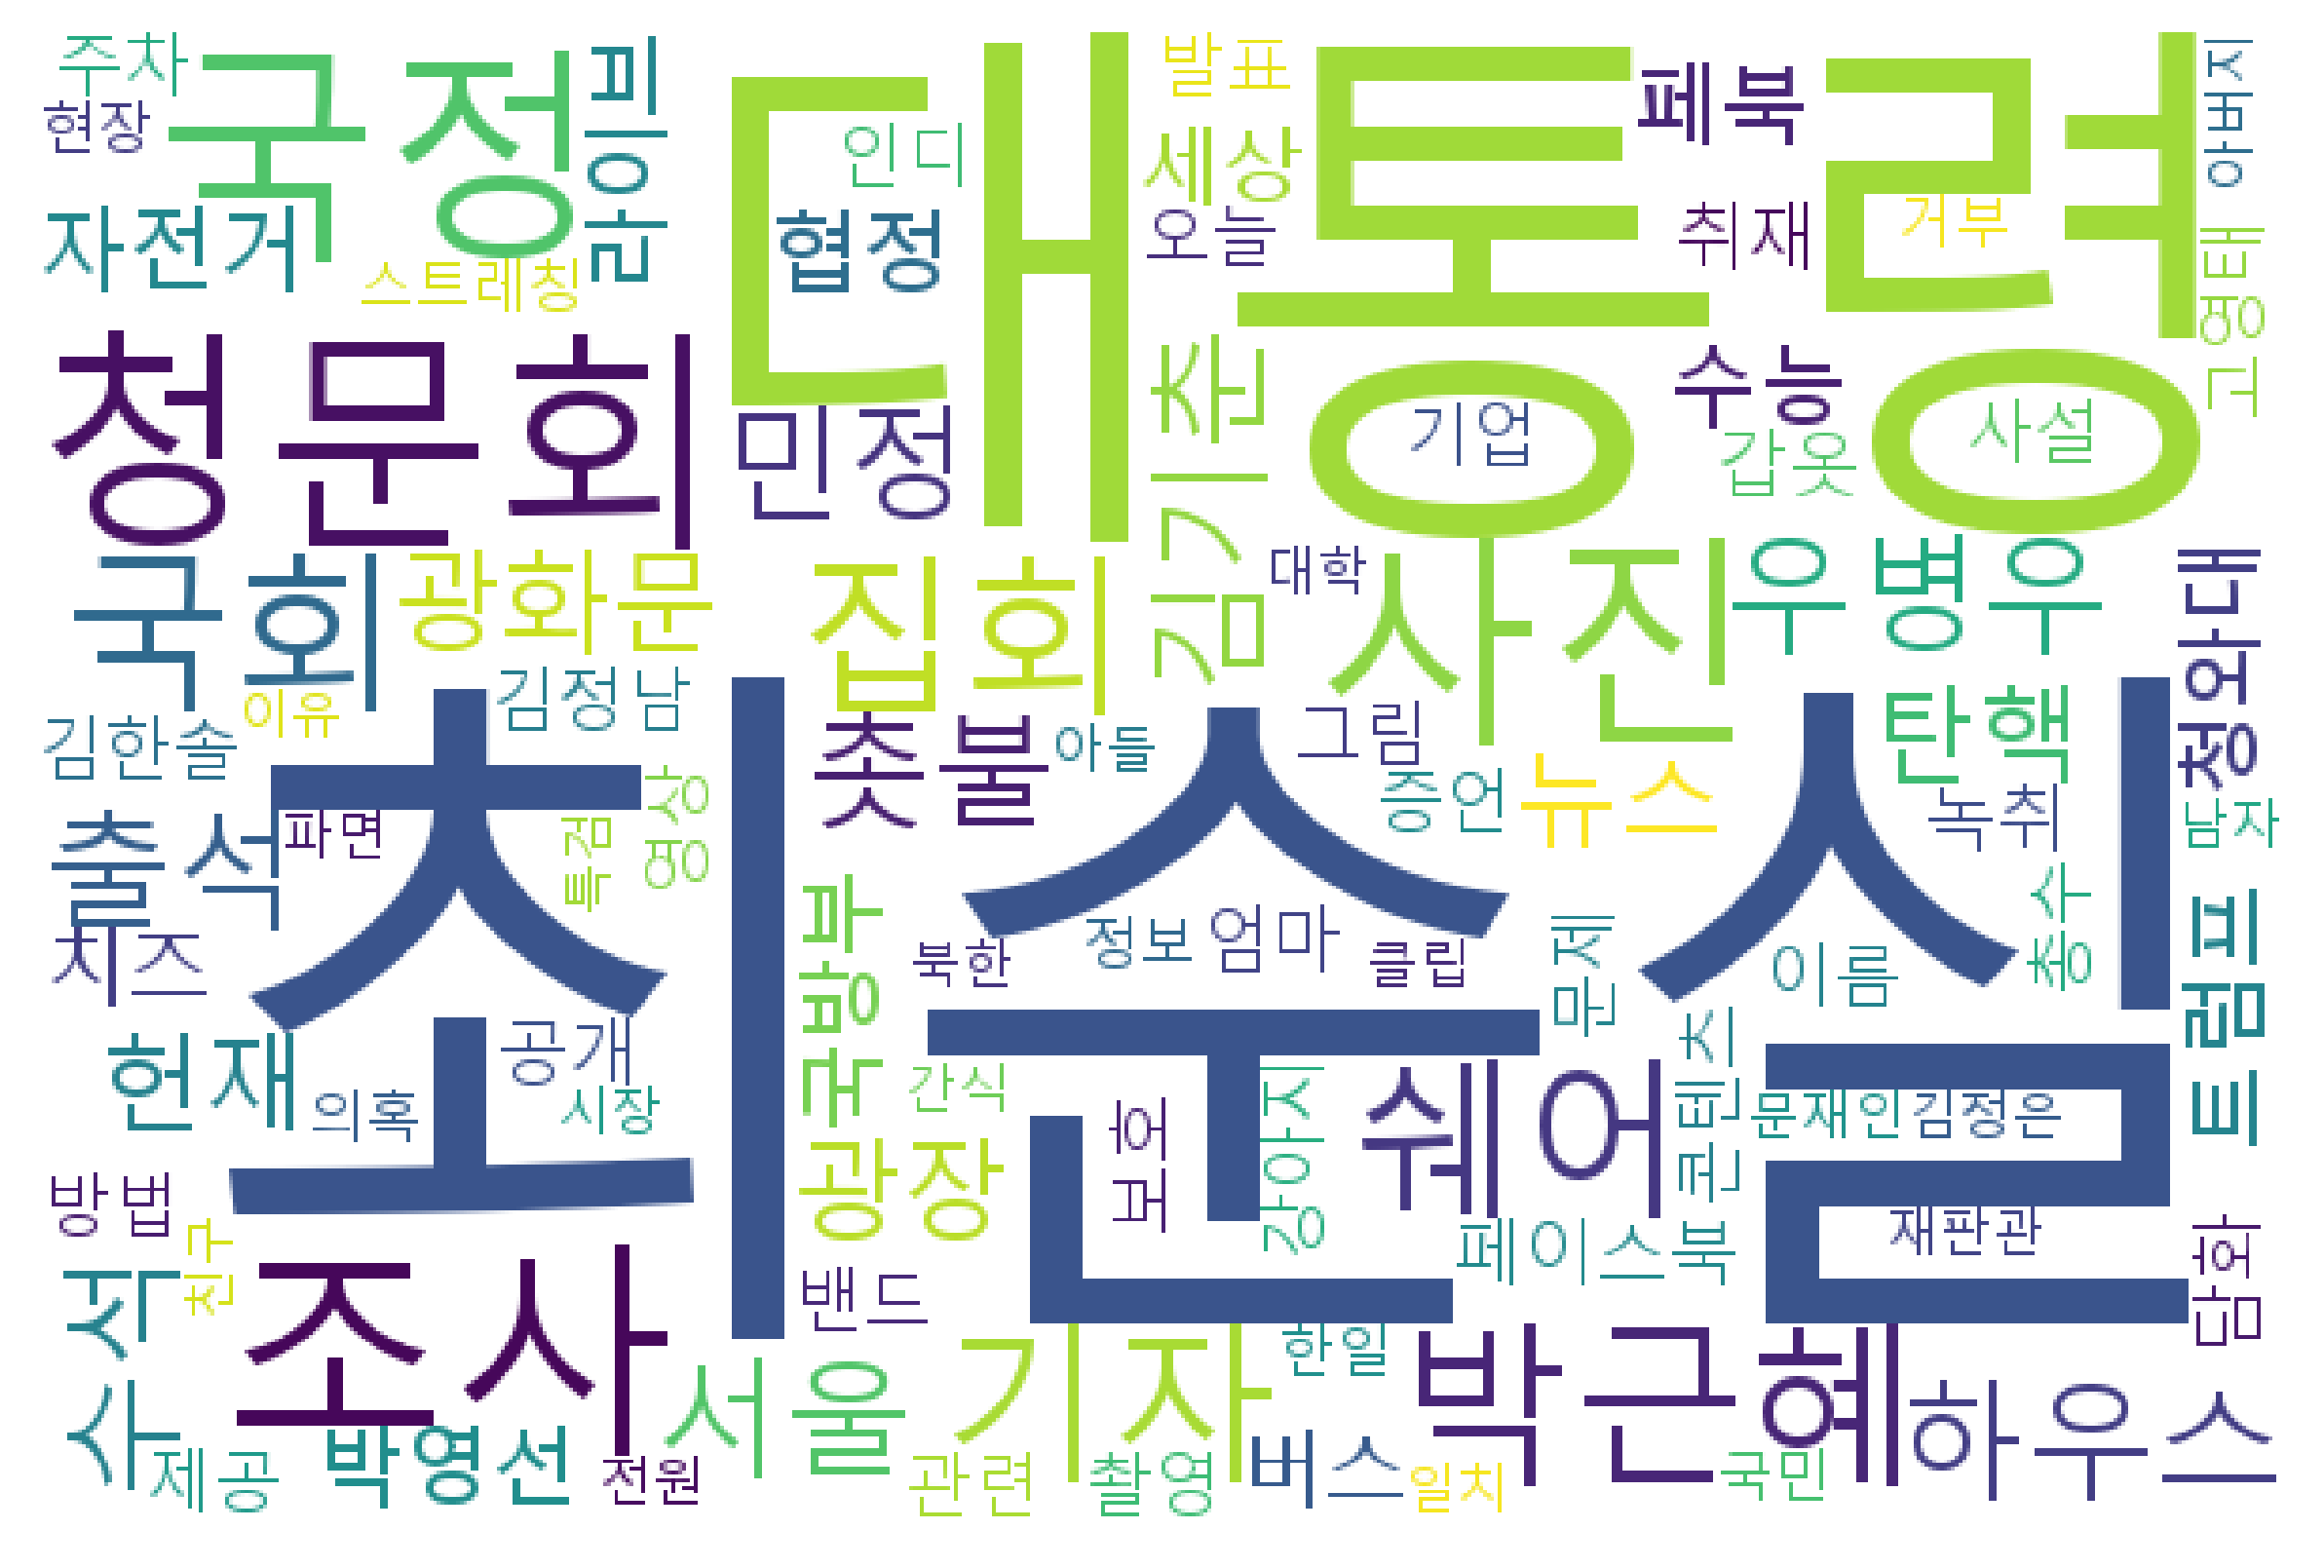

In [54]:
wordcloud = WordCloud(font_path='c:/Windows/fonts/malgun.ttf',
                     relative_scaling=0.2,
                     background_color='white',
                      width=600,
                      height=400
                     ).generate_from_frequencies(top_n_wordInfo)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig('wordcloud.jpg')

### 6.4 언어처리논문 요약

In [55]:
# open 파일
openFileName = '1989-to-2018-1664.txt'
corpus = open(openFileName, 'r', encoding='cp949')
lines = corpus.readlines()
wordInfo = defaultdict(int)
c = 0

for line in lines:
    if c%12==3:
        message = re.sub(r'(\n|\[.*\]|["",])', ' ', line)
        message = message.strip()
        if message:
            result_utagger = json.loads(ut.depen(message))
            nouns = extract_pos_depen(result_utagger, 0)
            #print(nouns)
            count = Counter(nouns)
            #print( count )

            # most_common은 입력된 값의 요소들 중 빈도수(frequency)가 높은 순으로 상위 n개를 리스트 안의 tuple 형태로 반환한다.
            # n을 입력하지 않은 경우, 요소 전체를 [('값', 개수)]의 형태로 반환
            for tags, counts in count.most_common():
                if (len(str(tags)) > 1):
                    wordInfo[tags] += counts

    c+=1

In [56]:
top_n=50
Sorted_Dict_Values = sorted(wordInfo.values(), reverse=True)
print(Sorted_Dict_Values[:top_n])
Sorted_Dict_Keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
print(Sorted_Dict_Keys[:top_n])

[58, 28, 19, 19, 13, 13, 12, 11, 9, 9, 9, 8, 8, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
['한글', '연구', '한국어', '인식', '정보', '시스템', '처리', '문자', '설계', '분석', '구조', '문서', '사전', '추출', '개발', '구현', '코드', '국어', '모델', '원리', '기법', '언어', '통사', '신경망', '화일', '변환', '기능', '개념', '어휘', '구성', '사용자', '지각', '전자', '자동', '과정', '컴퓨터', '운동', '접속', '영상', '분리', '의미', '인터페이스', '음성', '한자', '낱자', '표현', '숫자', '기술', '비교', '번역']


In [57]:
top_n_wordInfo = dict()
for i in range(top_n*3):
    top_n_wordInfo[Sorted_Dict_Keys[i]] = Sorted_Dict_Values[i]

top_n_wordInfo.items()

dict_items([('한글', 58), ('연구', 28), ('한국어', 19), ('인식', 19), ('정보', 13), ('시스템', 13), ('처리', 12), ('문자', 11), ('설계', 9), ('분석', 9), ('구조', 9), ('문서', 8), ('사전', 8), ('추출', 7), ('개발', 7), ('구현', 6), ('코드', 6), ('국어', 6), ('모델', 6), ('원리', 6), ('기법', 5), ('언어', 5), ('통사', 5), ('신경망', 5), ('화일', 5), ('변환', 5), ('기능', 4), ('개념', 4), ('어휘', 4), ('구성', 4), ('사용자', 4), ('지각', 4), ('전자', 4), ('자동', 4), ('과정', 4), ('컴퓨터', 4), ('운동', 4), ('접속', 3), ('영상', 3), ('분리', 3), ('의미', 3), ('인터페이스', 3), ('음성', 3), ('한자', 3), ('낱자', 3), ('표현', 3), ('숫자', 3), ('기술', 3), ('비교', 3), ('번역', 3), ('문장', 3), ('형태소', 3), ('해결', 3), ('모형', 3), ('검색', 3), ('기반', 3), ('시스팀', 3), ('표기', 2), ('제안', 2), ('머쉰', 2), ('프로그래밍', 2), ('방향', 2), ('압축', 2), ('엔트로피', 2), ('부정', 2), ('해석', 2), ('뭉치', 2), ('언어학', 2), ('특성', 2), ('단어', 2), ('통합', 2), ('인공', 2), ('실험', 2), ('글자', 2), ('접근', 2), ('필기체', 2), ('자모', 2), ('훈민정음', 2), ('창제', 2), ('관리', 2), ('분류', 2), ('알고리즘', 2), ('한영', 2), ('기계', 2), ('색인', 2), ('구축', 2), ('중의', 2), ('

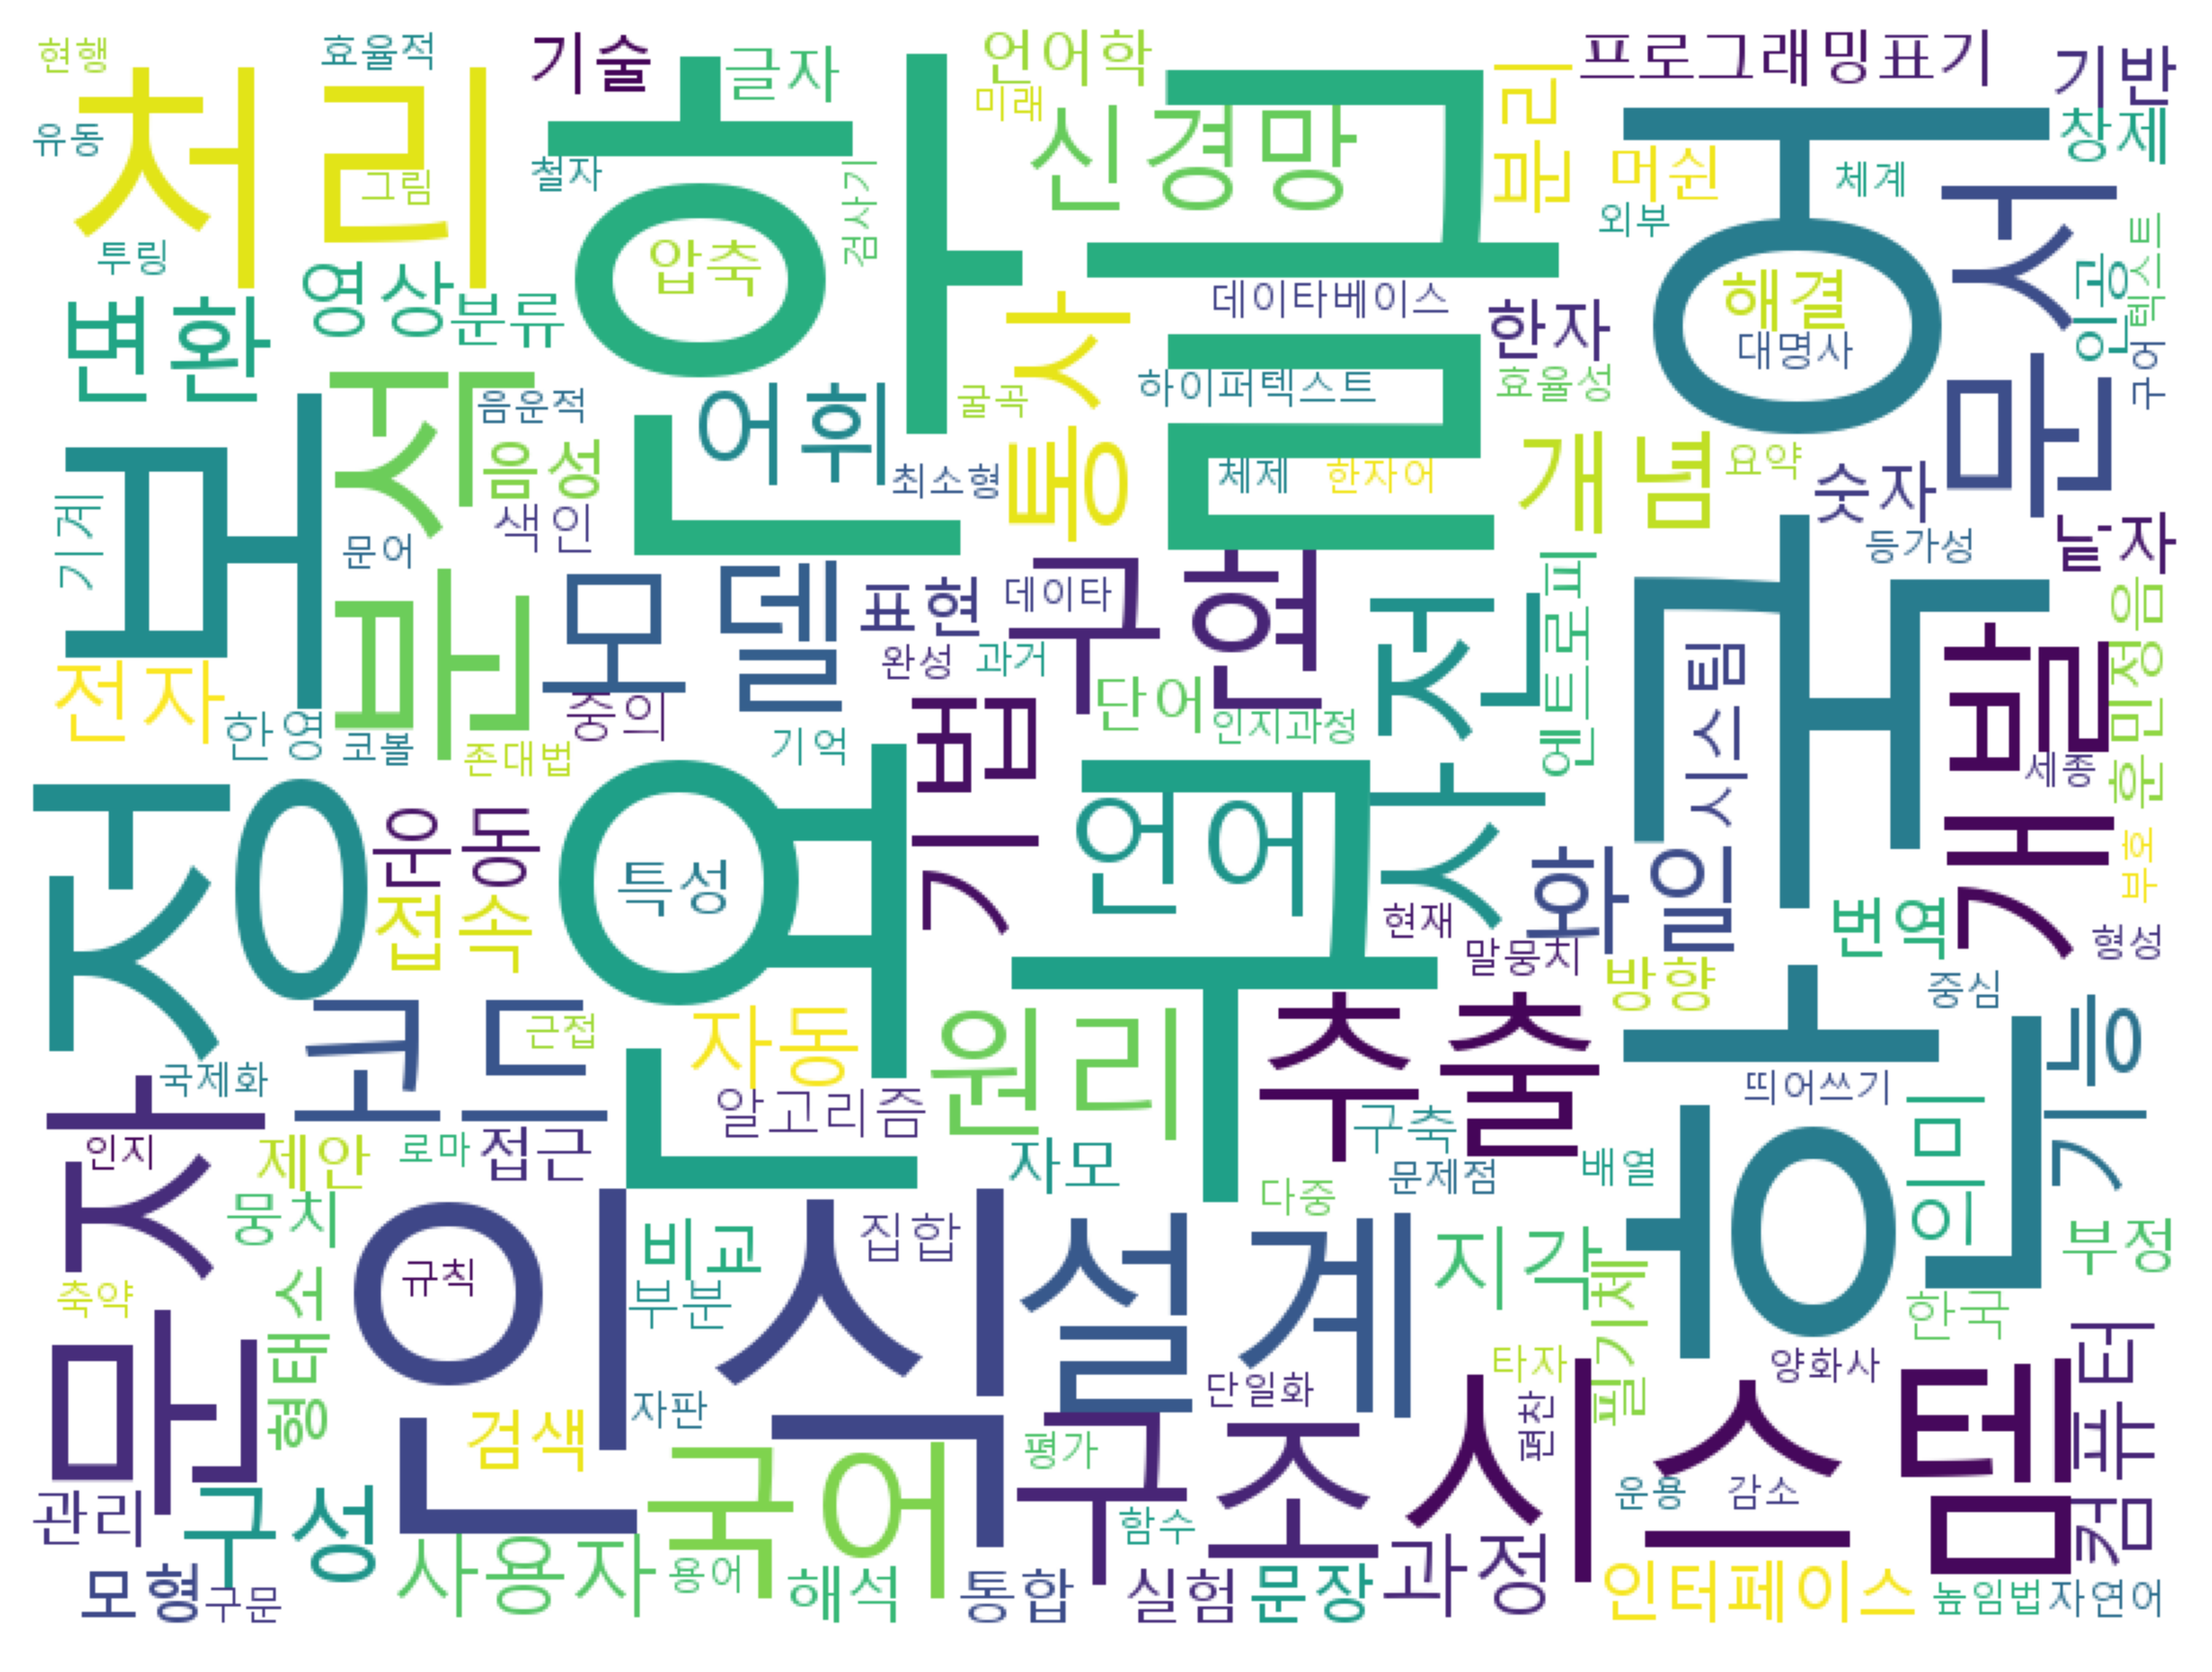

In [59]:
wordcloud = WordCloud(font_path='c:/Windows/fonts/Malgun.ttf',
                     relative_scaling=0.2,
                     background_color='white',
                      width=800,
                      height=600
                     ).generate_from_frequencies(top_n_wordInfo)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### image masking

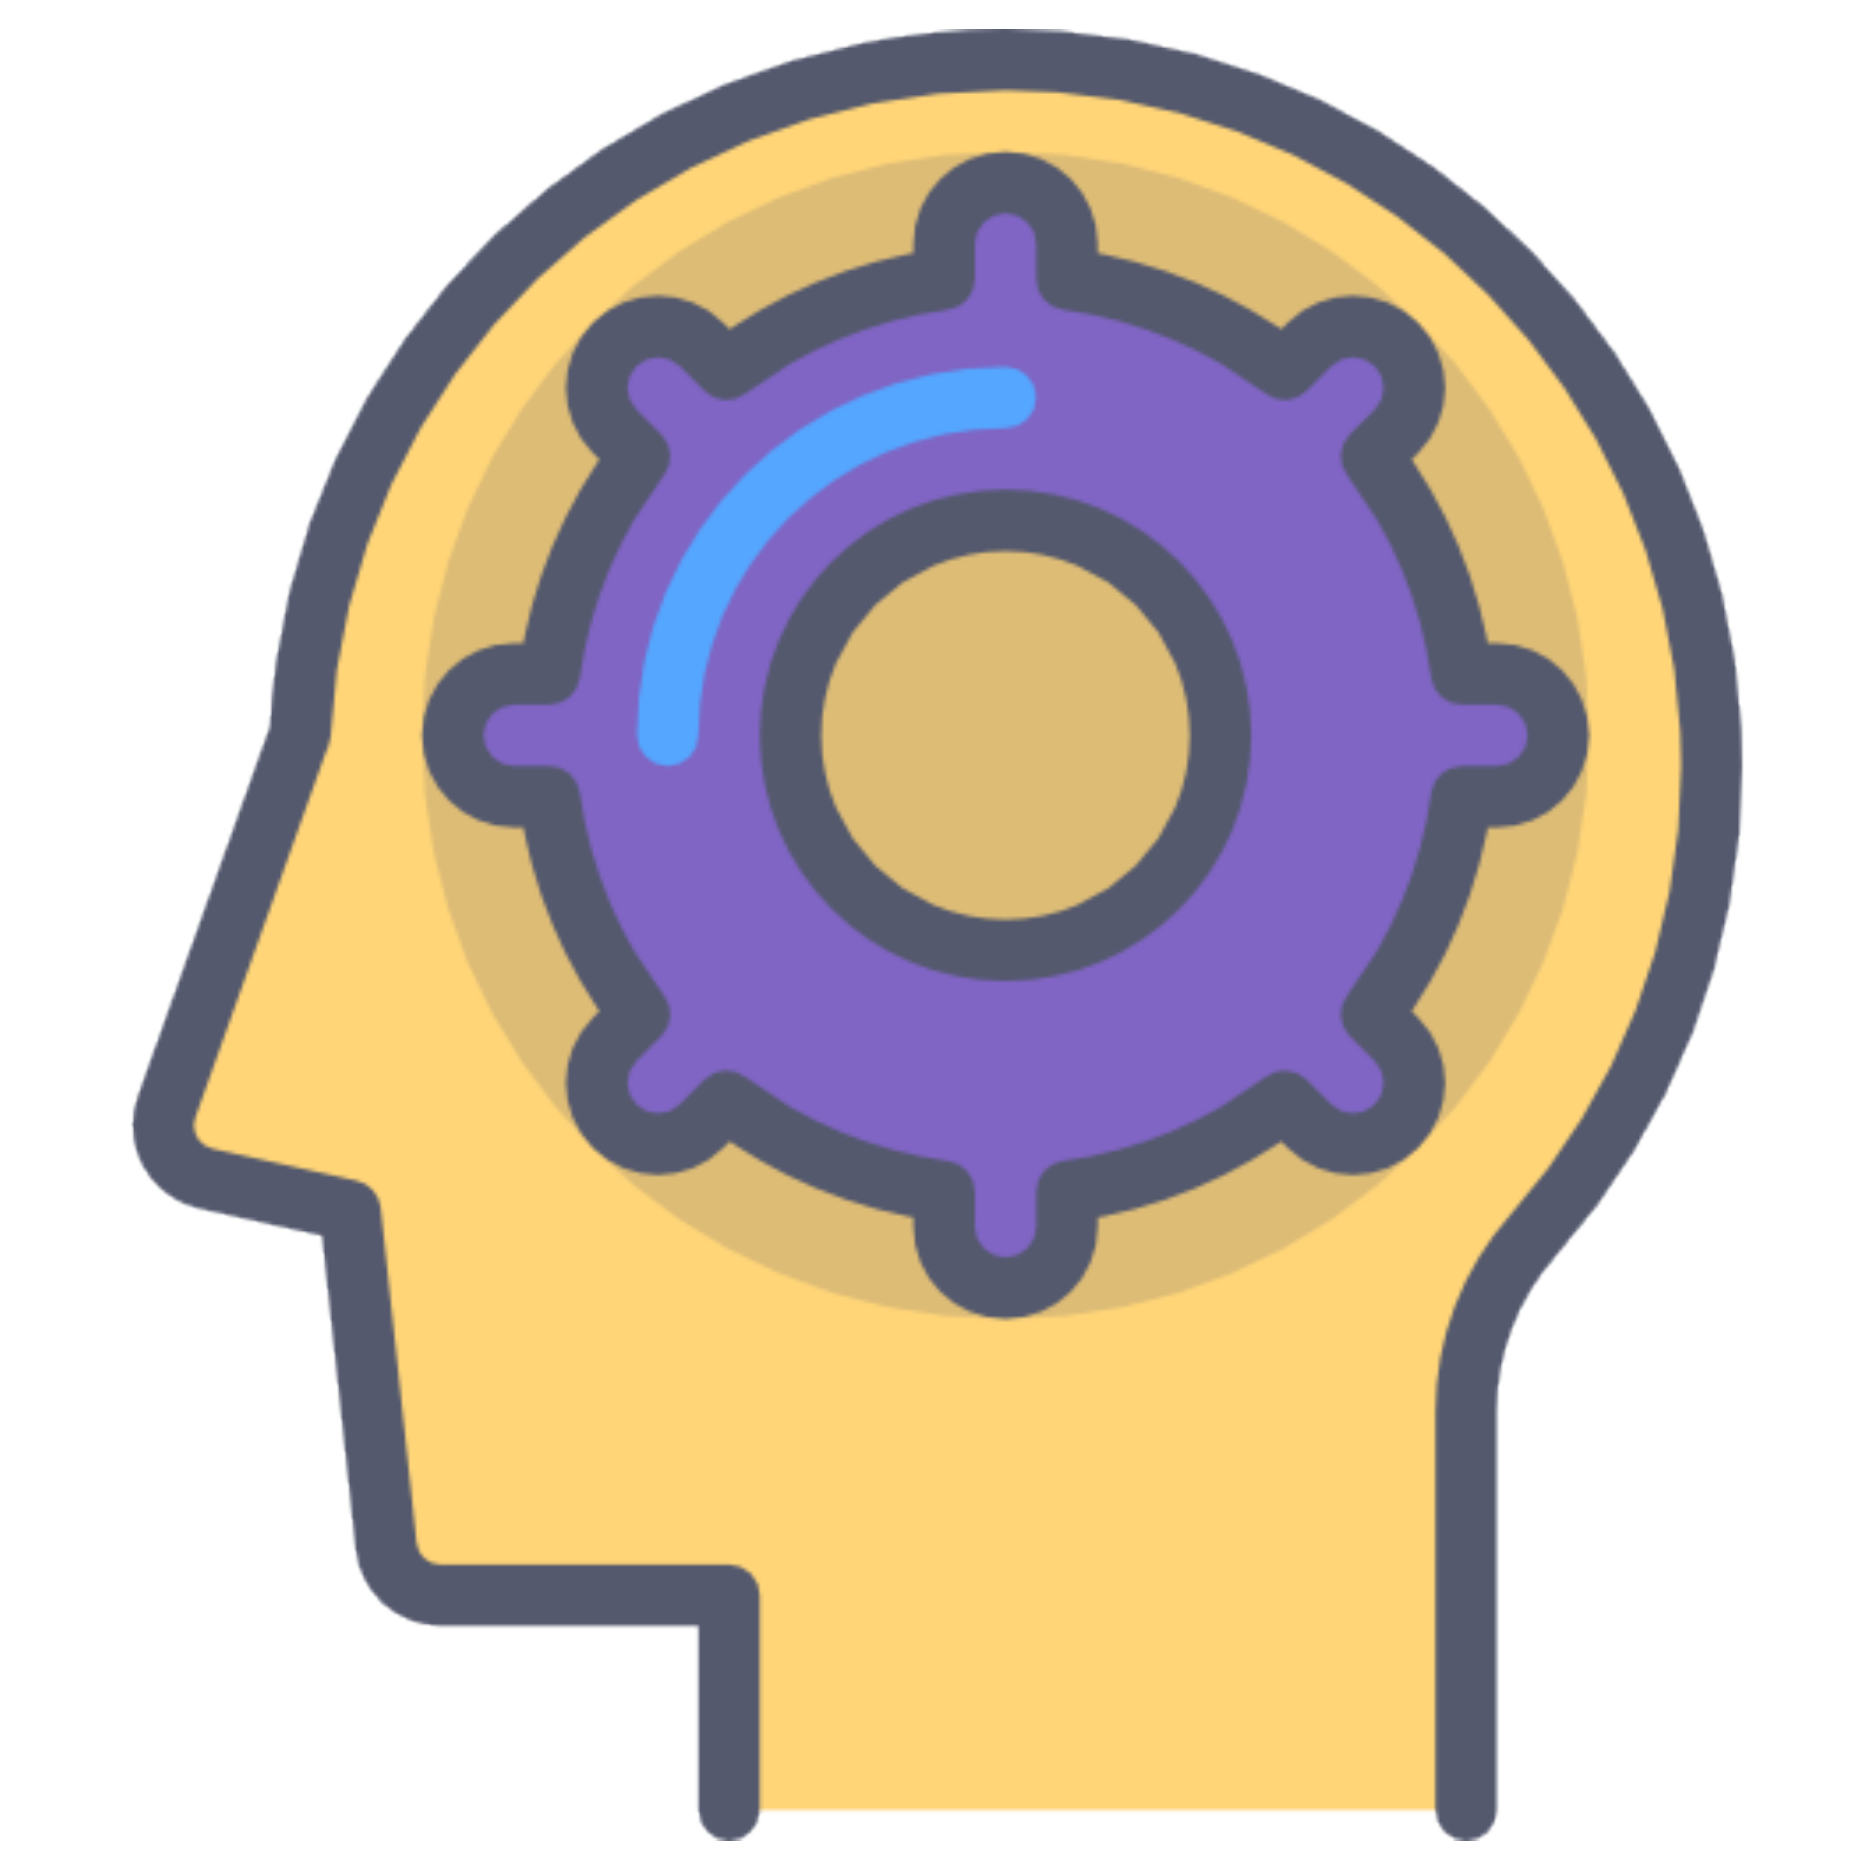

In [60]:
import numpy as np
from PIL import Image
brain_mask = np.array(Image.open('brain.png'))

plt.figure(figsize=(8,8))
plt.imshow(brain_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

<Figure size 3000x3000 with 0 Axes>

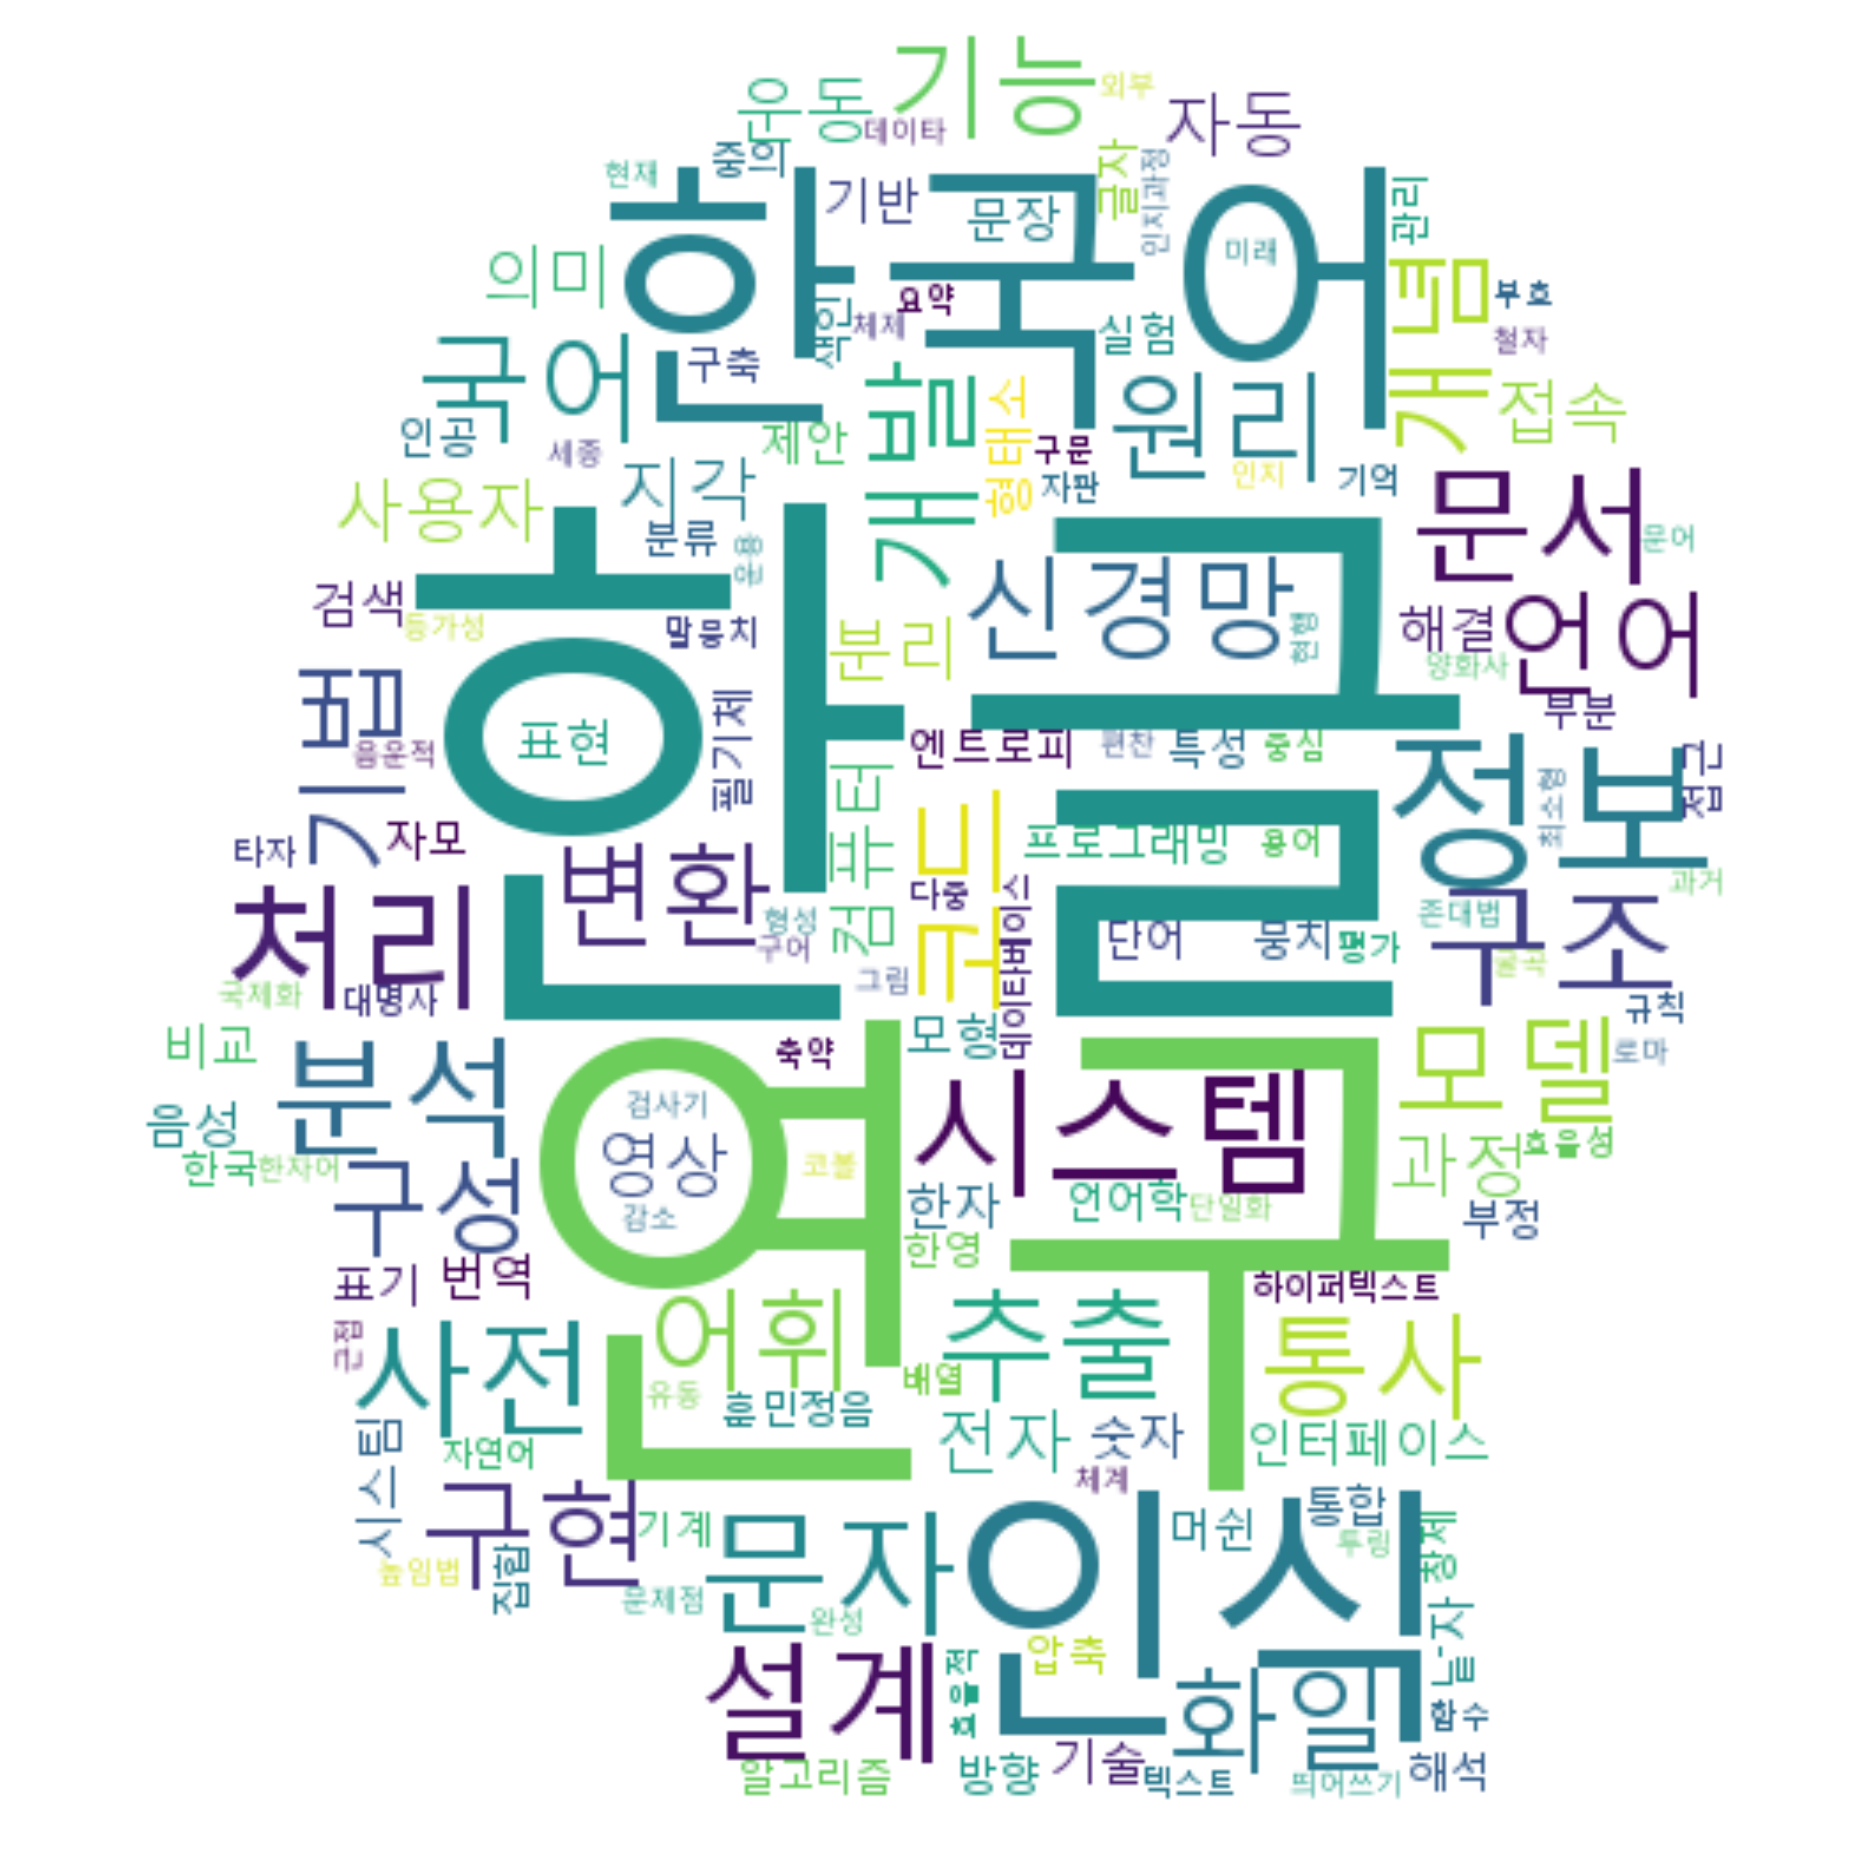

In [61]:
wordcloud = WordCloud(font_path='c:/Windows/fonts/Malgun.ttf',
                     relative_scaling=0.2,
                     mask=brain_mask,
                     background_color='white',
                     width=800, height=800
                     ).generate_from_frequencies(top_n_wordInfo)

fig = plt.figure(figsize=(10,10))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

## okcy@ulsan.ac.kr

## 5. Word Network
